# Multivariate Resemblance Analysis (MRA) 
In this notebook the multivariate resemblance analysis  is performed for all STDG approaches.

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = 'C:/Users/27261/Desktop/prostate/code-0126/' #home path of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/RESEMBLANCE'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)


#import functions for univariate resemblance analisys
from multivariate_resemblance import get_numerical_correlations
from multivariate_resemblance import plot_correlations
from multivariate_resemblance import get_categorical_correlations
from multivariate_resemblance import compute_mra_score

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [7]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV-FML','CTGAN','WGANGP']
SYNTHESIZERS = ['Real','GM','SDV-FML','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'Dataset_cedric/SYNTHETIC DATASETS_not_eanr/Train.csv',
            'GM' : HOME_PATH + 'Dataset_cedric/SYNTHETIC DATASETS_not_eanr/GM.csv',
            'SDV-FML' : HOME_PATH + 'Dataset_cedric/SYNTHETIC DATASETS_not_eanr/SDV-FML.csv',
            'CTGAN' : HOME_PATH + 'Dataset_cedric/SYNTHETIC DATASETS_not_eanr/CTGAN.csv',
            'WGANGP' : HOME_PATH + 'Dataset_cedric/SYNTHETIC DATASETS_not_eanr/WGANGP.csv'}
categorical_columns = ["cT(MRI)","Multifocaal", "pN", "1c (0) - Perifeer (1) -  Beide (2) - Transitie (3)"]
data = dict()

In [8]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category')
data

{'Real':            Age Multifocaal 1c (0) - Perifeer (1) -  Beide (2) - Transitie (3)  \
 0    60.254795           0                                                  3   
 1    66.391781           1                                                  3   
 2    69.010959           0                                                  1   
 3    41.136986           0                                                  3   
 4    74.665753           0                                                  1   
 ..         ...         ...                                                ...   
 228  68.350685           0                                                  1   
 229  73.531507           0                                                  1   
 230  65.734247           0                                                  1   
 231  60.189041           0                                                  1   
 232  69.282192           1                                                  2   
 
      

## 2. Plot PPC matrixes and calculate matrixes norms

In [9]:
#compute correlation matrixes for all datasets
# to remove the numerical variable of "eanr(I)"
cors_numerical = dict()
norms_numerical = dict()
for name in DATA_TYPES :
    cors_numerical[name], norms_numerical[name] = get_numerical_correlations(data[name])   # no missing values but result is nan?
norms_numerical

{'Real': 11.516,
 'GM': 11.0301,
 'SDV-FML': 8.7724,
 'CTGAN': 6.2917,
 'WGANGP': nan}

In [10]:
data['WGANGP'].isnull().sum()  # no missing values
data['WGANGP'].nunique() == 1   # constant value!   so it is the problem
# data['SDV-FML'].nunique() == 1  # all false

Age                                                                                 False
Multifocaal                                                                          True
1c (0) - Perifeer (1) -  Beide (2) - Transitie (3)                                  False
Preoperatief PSA                                                                    False
Aantal zones positive percentage                                                    False
Primaire Gleason                                                                    False
Secundaire Gleason                                                                  False
Grade group (highest)                                                               False
Target biopsie Core length (perc)                                                   False
Target biopsie Core length (mm)                                                     False
TargetBiopsie Primaire Gleason                                                       True
Target Bio

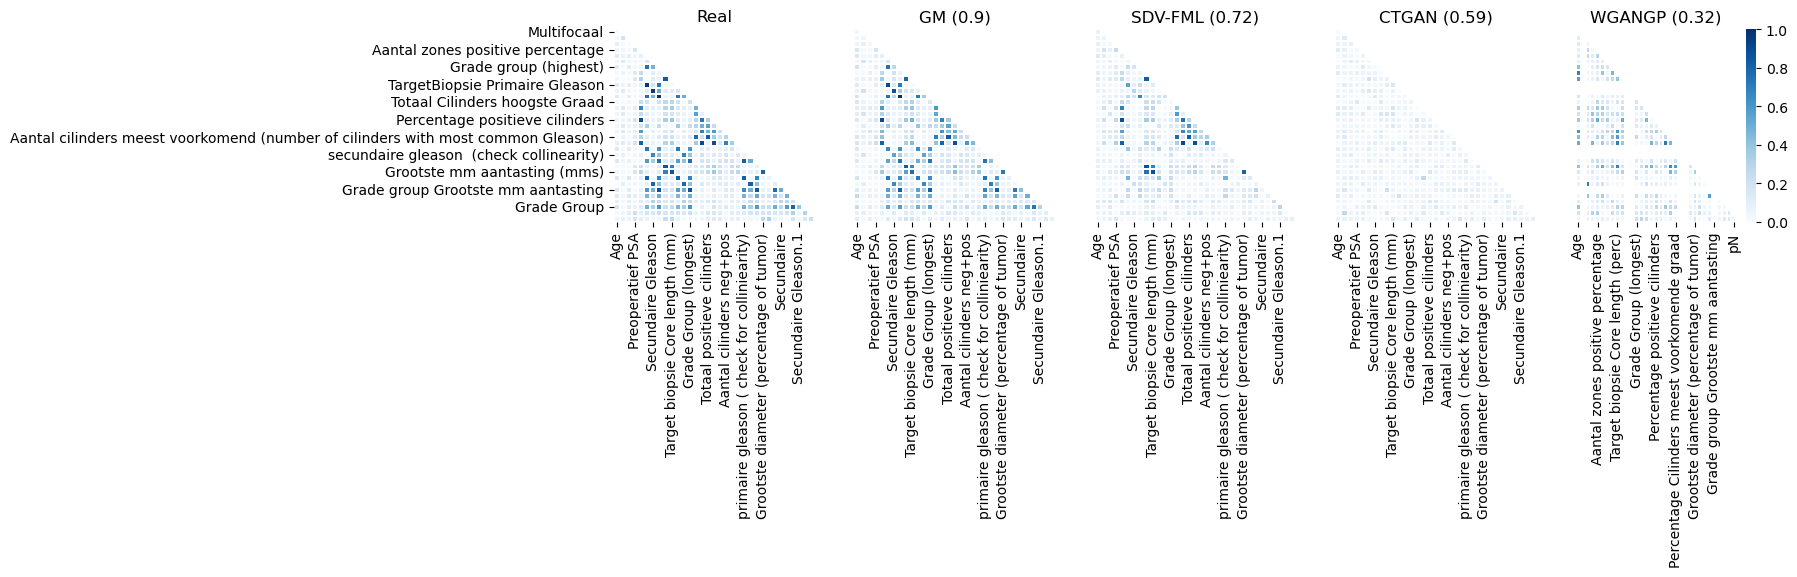

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 2.5))  # Pearson correlation matrices 
axs_idxs = range(6)
idx = dict(zip(DATA_TYPES,axs_idxs))

for name_idx, name in enumerate(DATA_TYPES) :
    ax = axs[idx[name]]
    matrix = cors_numerical[name]
    
    if name_idx != len(DATA_TYPES) - 1:
        plot_correlations(matrix, ax, color_bar=False)
    else:
        plot_correlations(matrix, ax, color_bar=True)
    
    if name_idx > 0:
        ax.set_yticks([])    
    
    if name == 'Real' :
        ax.set_title(name)
    else :
        score = compute_mra_score(cors_numerical['Real'], matrix)
        ax.set_title(name + ' (' + str(score) + ')')
    
# fig.savefig('MULTIVARIATE RESEMBLANCE RESULTS/PPC_Matrices.svg', bbox_inches='tight')

## 3. Plot correlations for categorical variables and calculate matrixes norms

In [12]:
#compute correlation matrixes for all datasets
cors_categorical = dict()
norms_categorical = dict()
for name in DATA_TYPES :
    cors_categorical[name], norms_categorical[name] = get_categorical_correlations(data[name])
norms_categorical

{'Real': 1.5309,
 'GM': 1.4497,
 'SDV-FML': 1.6303,
 'CTGAN': 1.9569,
 'WGANGP': 2.1076}

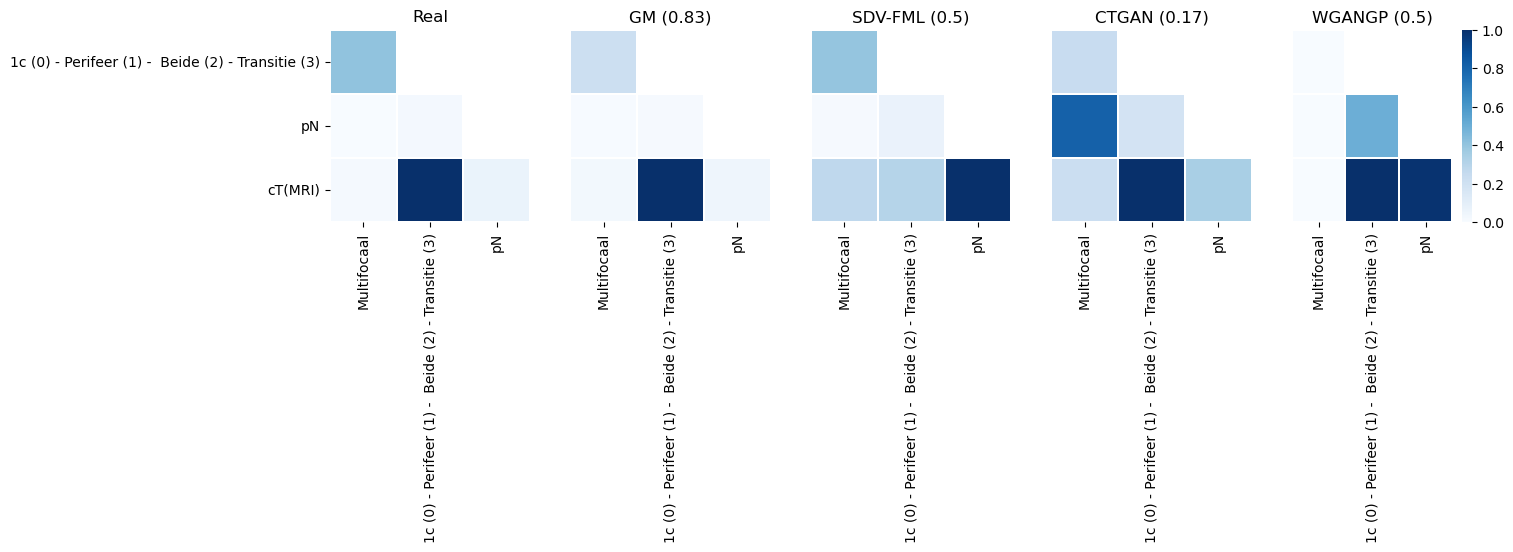

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 2.5))
axs_idxs = range(6)
idx = dict(zip(DATA_TYPES,axs_idxs))
first = True

for name_idx, name in enumerate(DATA_TYPES) :
    ax = axs[idx[name]]
    matrix = cors_categorical[name]
    
    if name_idx != len(DATA_TYPES) - 1:
        plot_correlations(matrix, ax, color_bar=False)
    else:
        plot_correlations(matrix, ax, color_bar=True)
    
    if name_idx > 0:
        ax.set_yticks([])    

    if name == 'Real' :
        ax.set_title(name)
    else :
        score = compute_mra_score(cors_categorical['Real'], matrix)
        ax.set_title(name + ' (' + str(score) + ')')
        
# fig.savefig('MULTIVARIATE RESEMBLANCE RESULTS/Categorical_Matrices.svg', bbox_inches='tight')

## 4. Explore the results

In [14]:
norms_numerical

{'Real': 11.516,
 'GM': 11.0301,
 'SDV-FML': 8.7724,
 'CTGAN': 6.2917,
 'WGANGP': nan}

In [15]:
norms_categorical

{'Real': 1.5309,
 'GM': 1.4497,
 'SDV-FML': 1.6303,
 'CTGAN': 1.9569,
 'WGANGP': 2.1076}

In [20]:
norms_data = [np.asarray(list(norms_numerical.values())), np.asarray(list(norms_categorical.values()))]
df_norms = pd.DataFrame(data=norms_data, columns=DATA_TYPES, index=['PPC_MATRIX_NORMS','CATEGORICAL_CORS_MATRIX_NORMS'])
df_norms.to_excel('C:/Users/27261/Desktop/Results/multi_cor.xlsx')
df_norms

,Real,GM,SDV-FML,CTGAN,WGANGP
PPC_MATRIX_NORMS,11.5160,11.0301,8.7724,6.2917,NaN
CATEGORICAL_CORS_MATRIX_NORMS,1.5309,1.4497,1.6303,1.9569,2.1076
